## Correlation / Convolution
( 영상처리에서는 Correlation과 Convolution이 혼용된다. (엄연히 따지면 Correlation NN) )  

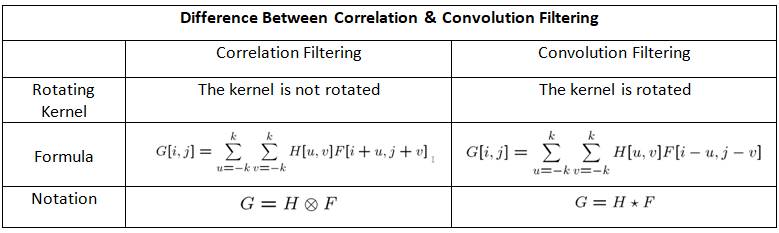


### Correlation -> 두 신호의 유사성 판단

#### 1D / 2D



### Convolution -> Filtering 

#### 1D / 2D



Input data:  [ 1  1  1  0  1  1  1  1  1  1  0 -1  0 -1  0  0  1 -1  0  1 -1 -1  0 -1
 -1  1 -1 -1  1 -1]
Length of data:  30 

Correlation :   [ 1.  0.  0.  2.  1.  1.  1.  1.  0. -2. -1.  0. -1.  1.  1.  0. -2.  2.
  0. -3.  0.  0. -2.  1.  1. -3.  1.  1.]
Output Length:  28


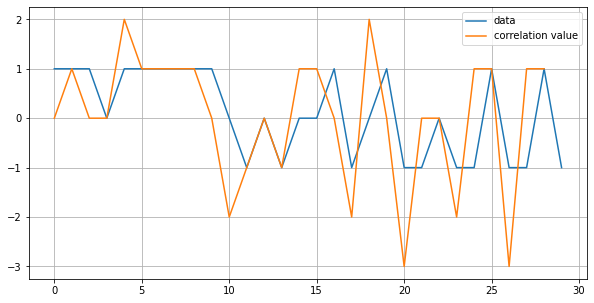

In [1]:
# 1D Correlation
import numpy as np
import random
import matplotlib.pyplot as plt

# input
data = np.random.randint(-1,2,(30,))
corr_filter = [-1, 1, 1]
data_len = len(data)
print("Input data: ", data)
print("Length of data: ", len(data), '\n')

# filter size and output length
filter_size = len(corr_filter)
output_len = data_len - (filter_size - 1)

output = np.zeros((output_len,))
for idx in range(output_len):
    # extract the window
    window = data[idx:idx+filter_size]
    output[idx] = np.sum(window*corr_filter)


print("Correlation :  ", output)
print("Output Length: ", len(output) )

fig, ax = plt.subplots(figsize=(10, 5))
# 0 for adjusting locations
output = np.append(np.zeros((1,)),output)
ax.plot(data, label='data')
ax.plot(output, label='correlation value')
ax.legend(fontsize=10)
ax.grid()

Input data:  [ 1  0  1  1  0  0  1 -1  1  1  1  0  0  1 -1  0  0  1 -1 -1  1  0  1  1
  0  1 -1 -1 -1  0]
Length of data:  30
corr_filter :  [-1, 1, 1]
conv_filter :  [ 1  1 -1]
Convolution:  [ 0.  0.  2.  1. -1.  2. -1. -1.  1.  2.  1. -1.  2.  0. -1. -1.  2.  1.
 -3.  0.  0.  0.  2.  0.  2.  1. -1. -2.]


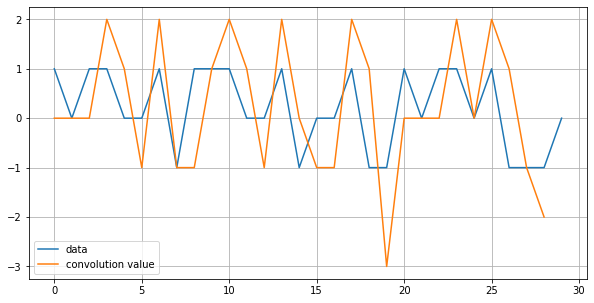

In [2]:
# 1D Convolution
# input
data = np.random.randint(-1,2,(30,))
corr_filter = [-1, 1, 1]
data_len = len(data)
print("Input data: ", data)
print("Length of data: ", len(data))
print('corr_filter : ', corr_filter)
print('conv_filter : ', np.flip(corr_filter))
# filter size and output length
filter_size = len(corr_filter)
output_len = data_len - (filter_size - 1)

output = np.zeros((output_len,))
for idx in range(output_len):
    # extract the window
    window = data[idx:idx+filter_size]
    output[idx] = np.sum(window*np.flip(corr_filter))
    
print("Convolution: ", output)

fig, ax = plt.subplots(figsize=(10, 5))
# 0 for adjusting locations
output = np.append(np.zeros((1,)),output)
ax.plot(data, label='data')
ax.plot(output, label='convolution value')
ax.legend(fontsize=10)
ax.grid()

In [3]:
# 2D correlation

# generate the random image
filter_size = 3
H, W = 5, 5
data = np.random.randint(0,5,(H,W))
print(data)
print('=====')

# generate the random filter
corr_filter = np.random.randint(0,5,(filter_size,filter_size))
print(corr_filter)
print('=====')

# Output
output_H, output_W = H - (filter_size - 1), W - (filter_size - 1)


output = np.zeros((output_H,output_W))
for h in range(output_H):
    for w in range(output_W):
        # extract the window
        filtered_data = data[h:h+filter_size,w:w+filter_size]*corr_filter
        output[h,w] = np.sum(filtered_data)
print('=====')

print(output)
    

[[3 1 0 4 3]
 [1 3 1 1 0]
 [4 0 3 2 0]
 [0 1 0 3 1]
 [3 0 1 2 4]]
=====
[[3 2 1]
 [3 2 4]
 [2 0 4]]
=====
=====
[[44. 30. 22.]
 [34. 40. 22.]
 [27. 31. 41.]]


In [4]:
# 2D convolution

# generate the random image
filter_size = 3
H, W = 5, 5
data = np.random.randint(0,5,(H,W))
print(data)
print('=====')

# generate the random filter
corr_filter = np.random.randint(0,5,(filter_size,filter_size))
conv_filter = corr_filter[::-1,::-1]
print('corr_filter \n',corr_filter)
print('conv_filter \n',conv_filter)
print('=====')

# Output
output_H, output_W = H - (filter_size - 1), W - (filter_size - 1)


output = np.zeros((output_H,output_W))
for h in range(output_H):
    for w in range(output_W):
        # extract the window
        filtered_data = data[h:h+filter_size,w:w+filter_size]*conv_filter
        output[h,w] = np.sum(filtered_data)
print('=====')

print(output)

[[2 3 4 3 4]
 [2 2 3 4 4]
 [2 3 0 0 3]
 [3 1 4 0 3]
 [3 1 4 4 4]]
=====
corr_filter 
 [[3 2 2]
 [3 4 0]
 [3 2 3]]
conv_filter 
 [[3 2 3]
 [0 4 3]
 [2 2 3]]
=====
=====
[[51. 56. 67.]
 [51. 34. 55.]
 [48. 47. 46.]]


## Edge Detection With Sobel Filter

filter
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
filter_size :  3
Input Image shape :  512 x 512
output Image shape :  510 x 510
=====


(-0.5, 509.5, 509.5, -0.5)

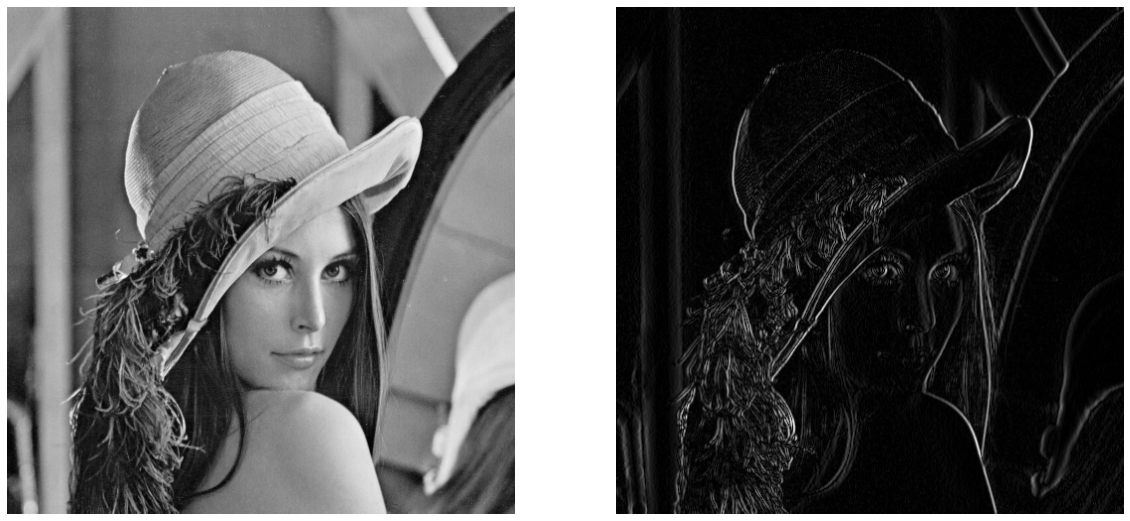

In [10]:
import matplotlib.pyplot as plt

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


img = plt.imread('./Image/lena.bmp')
img = np.array(img)
img = rgb2gray(img)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

corr_filter = sobel_x
filter_size = len(conv_filter)
print('filter\n', sobel_x)
print('filter_size : ', filter_size)
# Output
H,W = img.shape
print('Input Image shape : ',H,'x',W)
output_H, output_W = H - (filter_size - 1), W - (filter_size - 1)
print('output Image shape : ',output_H,'x',output_W)

output = np.zeros((output_H,output_W))
for h in range(output_H):
    for w in range(output_W):
        # extract the window
        filtered_data = img[h:h+filter_size,w:w+filter_size]*corr_filter
        output[h,w] = np.sum(filtered_data)
print('=====')

output = np.abs(output)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img, 'gray')
axes[0].axis('off')
axes[1].imshow(output, 'gray')
axes[1].axis('off')